In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure

In [65]:
def f(t):
    return 4*math.sin(math.pi*t)*math.cos(6*math.pi*t**2)

def y(n):
    t = np.arange(1,n+1)/n
    f2 = np.vectorize(f)
    mu, sigma = 0, 1# mean and standard deviation
    s = np.random.normal(mu, sigma, n)
    y_tilda = f2(t) +s
    return t,f2(t), y_tilda

def f_m(m,n,y):
    steps =(int) (n/m)
    f_vals =np.split(y,steps)
    sum_parts = [part.sum()/m for part in f_vals] 
    res = [] 
    for ele in sum_parts:
        for i in range(1, m+1):
            res = res + [ele]
    npa = np.asarray(res, dtype=np.float32)
    return npa

def empirical_error(m,n):
    t,y_true,y_tilda=y(n)
    f_1 = f_m(m,n,y_tilda)
    y_diff = y_true - f_1
    res = [ele**2 for ele in y_diff]
    
    return y_true,sum(res)*1/n


def avg_bias_sq(m,n,y_true):
      #t,y_true,y_tilda=y(n)
      y_true = np.array(y_true)
      a = int(n/m)
      bias = [];
      for j in range(1,a+1):
        sum_bar = 1/m*y_true[m*(j-1):m*j].sum()
        for k in range(m*(j-1),m*j):
            bias.append(sum_bar-y_true[k])
        #print(bias)
      res = [ele**2 for ele in bias]
      #print(bias)
      #print(res)
      return sum(res)/n
                
#     t,y_true,y_tilda=y(n)
#     ans = np.zeros(n);
#     for i in range(0, d):
#       ans += f_m(m,n,y_tilda)
#     ans *= 1/d
#     diff = ans - y_true
#     return 1/n*(np.square(diff).sum())
            
      
    

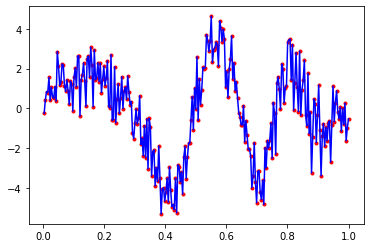

In [66]:
t,y_true,y_tilda=y(256)
plt.plot(t,y_tilda,'r.')
f_1 = f_m(1,256,y_tilda)
plt.plot(t,f_1,'b-')
plt.show()

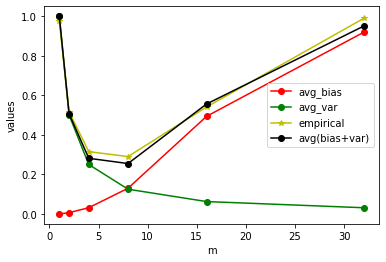

In [72]:
n=256
m_vals = [1,2,4,8,16,32]
avg_bias =[]
emps = []
for m in m_vals: 
    y_true, error=empirical_error(m,n)
    emps.append(error)
    bias= avg_bias_sq(m,n,y_true)
    avg_bias.append(bias)
    
avg_vars = [1/m for m in m_vals]

avg_err = [sum(x) for x in zip(avg_bias, avg_vars)]
plt.plot(m_vals,avg_bias,'r-o')
plt.plot(m_vals,avg_vars,'g-o')
plt.plot(m_vals,emps,'y-*')
plt.plot(m_vals,avg_err,'k-o')
plt.xlabel('m')
plt.ylabel('values')
plt.legend(['avg_bias','avg_var','empirical','avg(bias+var)'])
plt.savefig('B1.png')
plt.show()